## The DKRZ CMIP Data Pool

This demo is about the content of the data pool at dkrz mainly on the example of **CMIP6**. We show you
- an introduction into CMIP6
- how to use `intake-esm` and `pandas` to investigate the pool
- that analysis services profit from an elaborate CMIP data infrastructure

 > The [DKRZ CMIP data pool](https://www.dkrz.de/up/services/data-management/cmip-data-pool) contains often needed flagship collections of climate model data, is hosted as part of the DKRZ data infrastructure and supports scientists in high volume climate data collection, access and processing. 

Highlights of these climate model data collections:
 - [CMIP6](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6): The recent phase of the Coupled Model Intercomparison Project
 - [CMIP5](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip5)
 - [CORDEX](https://cordex.org/): The Coordinated Regional Downscaling Experiment.
 - [ERA5](https://www.dkrz.de/up/services/data-management/projects-and-cooperations/era): Weather data from the [European Centre for Medium-Range Weather Forecasts](http://www.ecmwf.int) by re-analysed and homogenised observation data.

### Understanding CMIP6 data

#### The goal of CMIP6:

In order to evaluate and compare climate models, a globally organized intercomparison project is periodically conducted.
CMIP6 tackles three major questions:

- How does the Earth system respond to forcing?
- What are the origins and consequences of systematic model biases?
- How can we assess future climate changes given internal climate variability, predictability, and uncertainties and scenarios?

<div>
<img src="https://mpimet.mpg.de/fileadmin/projekte/CMIP6/160621_CMIP6_Organigramm_web.png" width="400"/>
</div>

From [Eyring et al., 2016](https://gmd.copernicus.org/articles/9/1937/2016/). Schematic of the CMIP/CMIP6 experiment design

The CMIP6 framework allows smaller model intercomparison projects (MIPs) with a specific focus to be endorsed to CMIP6. That means, each model that runs the standard CMIP experiments can participate in CMIP6 and further MIPs.

#### Required Attributes and Controlled Vocabularies

Besides the technical requirements, the CMIP data standard defines **required attributes** in so called [**Controlled Vocabularies (CV)**](https://github.com/WCRP-CMIP/CMIP6_CVs). While some values are predefined, models and institutions have to be registered to become a valid value of corresponding attributes. For many attributes, both a short form with `_id` and a longer description exist.

Important required attributes:

- `activity_id`: A CMIP6-endorsed MIP that investigates a specific research question. It defines `experiment`s and requests data for it.
- `source_id`  : An ID for the Earth System Model used to produce the data.
- `member_id`  : The ensemble member. All members should be statistically equal. 
- `grid_label` : Specifies if the raw model output grid is used or if the data has been regridded to another. The native grid is reported with `grid_label=gn`.

In [3]:
import intake
col = intake.open_esm_datastore("/mnt/lustre02/work/ik1017/Catalogs/mistral-cmip6.json")

In [5]:
unique_activites=col.unique("activity_id")
print(list(unique_activites["activity_id"].values()))

[19, ['AerChemMIP', 'C4MIP', 'CDRMIP', 'CFMIP', 'CMIP', 'DAMIP', 'DCPP', 'FAFMIP', 'GMMIP', 'GeoMIP', 'HighResMIP', 'ISMIP6', 'LS3MIP', 'LUMIP', 'OMIP', 'PAMIP', 'PMIP', 'RFMIP', 'ScenarioMIP']]


In [1]:
unique_sources=col.unique("source_id")
print("Number of unique earth system models in the cmip6 data pool: "+str(list(unique_activites["source_id"].values())[0]))

NameError: name 'col' is not defined

In [2]:
unique_members=col.unique("member_id")
list(unique_members["member_id"].values())[1][0:3]

NameError: name 'col' is not defined

#### Data Reference Syntax

An atomic **Dataset** contains all files which cover the entire time span of a single variable of a single simulation. This can be multiple files in one.

The Data Reference Syntax (DRS) is a set of *required attributes* which **uniquely identify** and describe a dataset. The DRS usually includes all attributes used in the path templates so that both words are used synonymously. The DRS elements are arranged to a **hierarchical** path template for CMIP6:

CMIP6: `mip_era`/`activity_id`/`institution_id`/`source_id`/`experiment_id`/`member_id`/`table_id`/`variable_id`/`grid_label`/`version`

*Be careful when browsing through the CMIP6 data tree!*

**Unique** in CMIP6 data hierarchy:
- `experiment_id` in `activity_id` 
- `variable_id` in `table_id` : Both combined represent the **CMIP Variable**
- Only one `version` for one dataset should be published

In [26]:
# Searching for the MIP which defines the experiment 'historical':

cat = col.search(experiment_id="historical")
cat.unique("activity_id")

{'activity_id': {'count': 1, 'values': ['CMIP']}}

In [27]:
# Searching for all tables which contain the variable 'tas':

cat = col.search(variable_id="tas")
cat.unique("table_id")

{'table_id': {'count': 9,
  'values': ['3hr',
   '6hrPlev',
   '6hrPlevPt',
   'AERhr',
   'Amon',
   'CFsubhr',
   'ImonAnt',
   'ImonGre',
   'day']}}

In [25]:
cat = col.search(variable_id="tas", table_id="Amon")

Not **Unique** in CMIP6 data hierarchy:
- `institution_id` for both `source_id` + `experiment_id` ( + `member_id` )

No requirements for `member_id`

In [35]:
# Searching for all institution_ids which uses the model 'MPI-ESM1-2-HR' to produce 'ssp585' results:

cat = col.search(source_id="MPI-ESM1-2-HR", experiment_id="ssp585")
cat.unique("institution_id")

{'institution_id': {'count': 2, 'values': ['DKRZ', 'DWD']}}

In [36]:
# Searching for all experiment_ids produced with ESM 'EC-Earth3' and as ensemble member 'r1i1p1f1':

cat = col.search(source_id="EC-Earth3", member_id="r1i1p1f1")
cat.unique("experiment_id")

{'experiment_id': {'count': 9,
  'values': ['amip',
   'historical',
   'piClim-aer',
   'piClim-control',
   'piControl',
   'ssp126',
   'ssp245',
   'ssp370',
   'ssp585']}}

In [37]:
# Searching for all valid ensemble member_ids produced with ESM 'EC-Earth3' for experiment 'abrupt-4xCO2'

cat = col.search(source_id="EC-Earth3", experiment_id="abrupt-4xCO2")
cat.unique("member_id")

{'member_id': {'count': 2, 'values': ['r3i1p1f1', 'r8i1p1f1']}}

⇨ **Do not** search for `institution_id`, `table_id` and `member_id` unless you are sure about what you are doing.
Instead, begin to search for
`experiment_id`, `source_id`, `variable_id`.

### How can I find the variables I need?

1. **[Search](https://cfconventions.org/Data/cf-standard-names/77/build/cf-standard-name-table.html) for the matching `standard_name`**

Most of the data in the data pool is compliant to the [Climate and Forecast Convention](https://cfconventions.org/). This defines, among others, so called `standard_names`, which need to be assigned to variables as a variable attribute inside the data. Since these are very long, the name of the variable in the data is a shorter - a so-called short name. This short name is saved in the data catalogs which can be searched.

2. **[Search](http://clipc-services.ceda.ac.uk/dreq/mipVars.html) for corresponding `short_name`s in the CMIP6 data request**

E.g., you get many results for `air_temperature`. Multiple definitions for one ‘physical’ variable like air_temperature exist in CMIP: Each is a combination of requirements for 
- frequency
- time cell methods (average or instantaneous)
- vertical level (e.g. interpolated on pressure levels)
- grid
- realm (e.g. atmosphere model output or ocean model output)
of the variable.

This requirements is set according to the interest of the MIPs. Variables with the same requiremnts are collected in one MIP-table which can be identified by `table_id`.

### Investigating the pool content

In [1]:
import intake
col = intake.open_esm_datastore("/mnt/lustre02/work/ik1017/Catalogs/mistral-cmip6.json")

In [31]:
def pieplot(gbyelem) :
    size = col.df.groupby([gbyelem]).size().sort_values(ascending=False)
    size10 = size.nlargest(10)
    size10[9] = sum(size[9:])
    size10.rename(index={size10.index.values[9]:'all other'},inplace=True)
    return size10.plot.pie(figsize=(18,8),ylabel='',autopct='%.2f',)

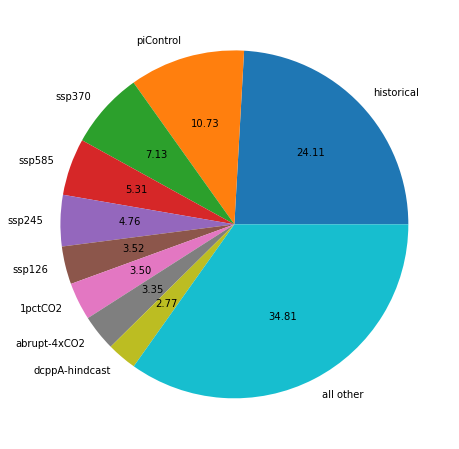

In [32]:
pieplot("experiment_id")

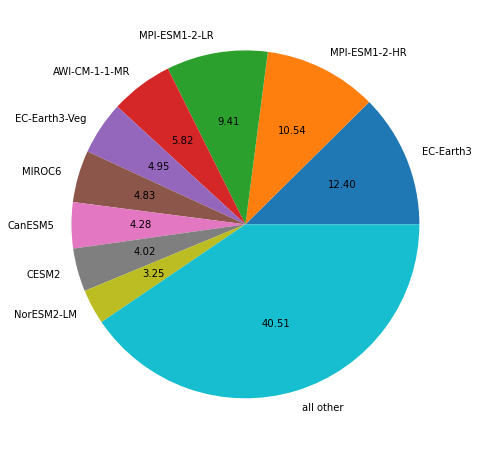

In [33]:
pieplot("source_id")

### Benefits from the CMIP data infrastructure

The CMIP6 data at DKRZ comprises about 4 PB. In order to tackle the challenges of data provision and dissemination for such a repository size, a [state-of-the-art data infrastructure](https://www.dkrz.de/c6de/dicad/dicad?set_language=en&cl=en) has been developed around that pool. In the following, we highlight three aspects of the data workflow.

#### Data quality

CMIP6 data is only available in a common and **reliable** [Data format](https://goo.gl/neswPr)
- No adaptions needed for output of specific models
- Makes data **interoperable** and enables general cmip-analysing software products as ESMVal

CMIP6 data was **quality controlled** before published with [PrePARE](https://cmor.llnl.gov/mydoc_cmip6_validator/)
- We can ensure e.g. correct coordinates and attribute configurations in the data

CMIP6 data is **transparent** about occuring errors
- Search the [errata](errata.es-doc.org/) data base for origins of suspicious analysis results

#### Data publication

- **Find and access** data via the fail-safe [ESGF portal](esgf-data.dkrz.de) due to the redundant network of ESGF nodes
- Exentended **documentation** for simulation conducts provided in the [ES-Doc](https://explore.es-doc.org/) data base
- [**Persistent Identfier**](https://esgf-data.dkrz.de/projects/esgf-dkrz/pid) (PIDs) ensure long-term webaccess to dataset information
- [**Citation information**](cmip6cite.wdc-climate.de) and DOIs for all published datasets easily retrievable

#### Data curation

The CMIP6 data pool is maintained by
- automatic **ingest** and **egest** which keeps the data updated
- **Back ups** of the data pool in the tape archive
- **Long term archival** for a range of datasets used in the IPCC report

⇨  High quality Analysis services only because of a high quality data supply

Keep *Acknowledging* and *requesting* high data quality!